Notebook is copyright &copy; of <a href="https://ajaytech.co"> Ajay Tech </a>

# Naive Bayes Classifier

## Contents

- What is Naive Bayes
- Bayes Theorem & Conditional Probability
- Naive Bayes Theorem
- Example - Classify Fruits based on characteristics
- Example - Classify Messages as Spam or Ham
  - Get dataset
  - EDA
  - Simple data engineering
  - Sparse Matrix format
  - What is a Corpus
  - Training and test datasets
  - Data modeling
  - Verify results
- Challenge - Classify Congressman as Democrat or Republican
- Naive Bayes on Continuous variable.

<hr>

### What is Naive Bayes

Say you get an email like so,

**From** : njlotterries1234@gmail.com <br>
**Subject** : You won Lottery <br>
**Body** : Congratulations !!! You won a lottery of 5 Million dollars. Click here to claim.. <br>





What do you think of this ? Is this a spam e-mail or not ? In all probability this is spam. How do you know it ? Well, you look at the index words - words like "lottery" , "viagra" , "free", "money back". When you see these words, generally you tend to classify that message as spam. This is exactly how Naive Bayes works. Let's formalize our understanding a bit by going a bit deeper.

<hr>

### Bayes Theorem & Conditional Probability

Before we get into "Naive" Bayes, we have to first understand **Bayes** theorem. To understand Bayes theorem, we have to first understand something called _Conditional Probability_. What exactly is it ?

Say there is a standard deck of cards and you draw a card at random. 



- What is the probability that it is a red card ?

<img src="./pics/probability_red_card.png" style="background:white"/> 

- What is the probability that it is a face card, given that it is a red card ?

<img src="./pics/probability_red_card_face_card.png" style="background:white"/>

This is called conditional probability. Bayes theorem is an alternate way to compute the same thing.

<img src="./pics/bayes_formula.png"/>

Now, let's calculate each one of these probabilities.

- Probability of face card P(A)

<img src="./pics/probability_face_card.png"/>

- Probability of a red card



<img src="./pics/p_red.png"/>

- Probability of a red card , given it is a face card.

<img src="./pics/p_red_face.png"/>

- And finally, we calculate the probability of a face card, given its a red card P ( face | red )

<img src="./pics/p_face_red.png"/>

What did we achieve here ? Looks like we have made things more complicated, right ? I agree with you. In fact, this formula is not all that useful in machine learning. But there is an assumption that makes this formula extraordinarily useful in ML. Let's go back to the email example.



<img src="./pics/p_spam.png"/>

Again, not very useful. To calculate the probability of "You won lottery" is very arbitrary. You cannot calculate the probability of occurrence of all different phrases or combination of words. The next time around / the subject line might say "Congratulations!! You won lottery" -which is slightly different from ' 'You won lottery" . Point being, you cannot possibly Calculate all different combination of words that could result from the use of all different words in the English dictionary. 



<hr>

### Naive Bayes

This is where the Bayes theorem becomes **Naive** . Let's revisit the formula again.



<img src="./pics/p_spam_revisirt.png"/>

The probability of the word "You" occurring in the email is independent of the Lord ' "Won" occurring. eg.,



- Do you have the paper with **you** ?
- we have won the **contract**

These Sentences are completely independent. When we break down the event into the respective independent events, probability can be Simplified as follows. 


<img src="./pics/p_you_won_lottery.png"/>

This is actually a "Naive" assumption - because in reality, there is some level of overlap. Meaning, when you mention the word "lottery", you almost always use the word "win" or some variant-like ''won'" or "winning" . However, this is where ML is lucky. Even with the naive assumption, results are pretty good with text classification in real life. Let's apply the simplification to the Bayes theorem once again.



<img src="./pics/p_spam_revisit.png"/>

With a bit of naivety, this formula became so much more useful. In fact, it makes it so useful that Naive Bayes is almost exclusively used for most text classification tasks. Let's explore this example with some rough data - just believable, made-up data. 



- Probability of "You won lottery" being spam.

<img src="./pics/data_made_up.png"/>

- Probability of "You won spam" as NOT spam. 

<img src="./pics/you_won_lottery_not_spam.png"/>

So, the probability of this phrase not being spam is 1.51. 



<img src="./pics/p_not_spam_vs_spam.png"/>

Pretty effective, right? Especially given the simplification. Calculating the probability of the individual words is easy. The heart of this algorithm is, given any sentence, this algorithm can break it down into it's components (words) and based on the "spamminess" of each of the words, the entire sentence can be classified as spam or not.



All we are trying to do in Naive Bayes, is to break down a complicated problem into its components. Once the component is classified, essentially the bigger piece is classified as well.




It is like solving a jigsaw puzzle. How do you solve one typically ? You look for smaller puzzles to solve. Say this is a picture of a car - you start to look for smaller components of the car, like a tire, a windshield and solve for each of these separately. Once you got the pieces figured out, all you have to do is to put them in order. Naive Bayes works more or less like this.





<img src="./pics/solve_jigsaw_puzzle.png"/>

<hr>

### Classify fruits based on Characteristics

Now that we understand the basics of Naive Bayes, let's create a simple dataset and solve it in excel. The purpose behind this exercise is to get familiar with Naive Bayes calculation using a smaller dataset. This is going to solidify our understanding a bit further, before we dive into more complicated examples.



<img src="./pics/fruits_characteristics.png"/>

Solve the fruits dataset in excel

$P_{apple} = 3/9 = 0.333$ <br>
$P_{grape} = 3/9 = 0.333$ <br>
$P_{melon} = 3/9 = 0.333$




The probability of each of the characteristics - round, large, small etc, can be calculated as below.


<img src="./pics/p_round_large.png"/>

Now, let's move on to the individual conditional probabilities. For example, what is the probability that a fruit is round, given that it is an apple ? In all the cases of Apple, the fruit is always round.



<img src="./pics/p_round_apple.png"/>

However, what is the probability that a fruit is red, given that its an apple ? one out of three apples are red.



<img src="./pics/red_apple.png"/>

Like that, we keep calculating the conditional probabilities of all the individual characteristics. Think of this like calculating the probability of each individual word being spam or not.



<img src="./pics/all_3.png"/>

Time to test our data. Let's say, we want to calculate the probability of a fruit being an Apple, if it is round and large. All we have to do is plug the numbers.



<img src="./pics/p_apple_round_large.png"/>

What is the probability that a fruit is an apple, if it is round, large and smooth ?



<img src="./pics/p_apple_round_large_smooth.png"/>

Based on our little dataset, we are not doing too bad. let's do the opposite now. What is the probability of a fruit being a grape, given that it is round, large and smooth ?



<img src="./pics/p_grape_round_large_smooth_green.png"/>

Makes sense, right ? grape is never "large". Hence the probability of a fruit being a grape if it is "large" is relatively small - 16 %.



<hr>

#### Solve the fruits dataset in Python

In [3]:
library(e1071)

fruits = read.csv("./data/fruits.csv")

In [4]:
fruits

fruit,round,large,small,red,green,black,golden,yellow,smooth,rough
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
apple,yes,yes,no,yes,no,no,no,no,yes,no
apple,yes,yes,no,no,yes,no,no,no,yes,no
apple,yes,yes,no,no,no,no,yes,no,yes,no
grape,yes,no,yes,yes,no,no,no,no,yes,no
grape,yes,no,yes,no,yes,no,no,no,yes,no
grape,yes,no,yes,no,no,yes,no,no,yes,no
melon,yes,yes,no,no,yes,no,no,no,yes,no
melon,yes,yes,no,no,no,no,yes,no,no,yes
melon,yes,yes,no,no,no,no,no,yes,no,yes


In [6]:
model = naiveBayes(fruit ~ . , data = fruits)  

In [12]:
pred = predict ( model , fruits[,2:11 ])

In [13]:
pred

[1] apple apple apple grape grape grape apple melon melon
Levels: apple grape melon

In [16]:
table(pred, fruits[,1])

       
pred    apple grape melon
  apple     3     0     1
  grape     0     3     0
  melon     0     0     2

That's not bad, given such a small set of characteristics. Let's actually get the confusion matrix to get the accuracy percentage. 

In [19]:
library(caret)

cm = confusionMatrix(pred,as.factor(fruits[,1]))
cm

Confusion Matrix and Statistics

          Reference
Prediction apple grape melon
     apple     3     0     1
     grape     0     3     0
     melon     0     0     2

Overall Statistics
                                          
               Accuracy : 0.8889          
                 95% CI : (0.5175, 0.9972)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 0.0009653       
                                          
                  Kappa : 0.8333          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: apple Class: grape Class: melon
Sensitivity                1.0000       1.0000       0.6667
Specificity                0.8333       1.0000       1.0000
Pos Pred Value             0.7500       1.0000       1.0000
Neg Pred Value             1.0000       1.0000       0.8571
Prevalence                 0.3333       0.3333       0.3333
Detection Rate             0.3333       0

That's an accuracy of almost 90%. We are not very far off, given our dataset is pretty small. The one place where we went wrong is in classify a melon wrongly as an apple. If we compared the predictions vs the actuals, we can see that we went wrong with the 7th entry ( a melon being mis-classified as an apple )

In [22]:
predict = pred
actual = fruits[,1]

data.frame(predict,actual)

predict,actual
<fct>,<fct>
apple,apple
apple,apple
apple,apple
grape,grape
grape,grape
grape,grape
apple,melon
melon,melon
melon,melon


Let's check out the actual entry.



<img src="./pics/entries_comparision.png"/>

As you can see, the entry for melon ( watermelon ) coincides in its data points to the green apple. How could this happen ? This is because of an oversimplification with regards to size. We only have 2 sizes - small and large. However, both the apple and water melon are large ( and round and smooth ). And that's why the NB algorithm got it wrong. If we had an extra size characteristic ( say XL ), that would have solved this problem.

<hr>

### Classify messages as Spam

Now that we understood the basics of Naive Bayes along with a simple example in excel and R, we can proceed to solve the problem that we started with - To classify a message as spam or not.

<hr>

**Step 1** - Get the dataset <br>
There is a simple SMS ( text message ) dataset available at <a href="https://www.kaggle.com/uciml/sms-spam-collection-dataset">kaggle</a> or at the <a href="https://archive.ics.uci.edu/ml/datasets/sms+spam+collection">UCI ML datesets</a>. You can also download the file from <a href="https://github.com/ajaytech002/DataScience_Python/blob/master/week_3_ml_algorithms/data/spam.csv">Ajay Tech's github page</a>.  Download the zip file and open it in excel as a tab delimited format. Each of these messages have been classified as either spam or ham ( ham is just a technical word for "non-spam" ). Open the dataset in excel as a tab-delimited format and give column names ( if not available already ).



**Step 2** - Read the dataset into R

In [13]:
data = read.csv("./data/spam.csv", encoding='ISO-8859-1')

In [14]:
head(data)

,class,message,X,X.1,X.2
,<fct>,<fct>,<fct>,<fct>,<fct>
1,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
2,ham,Ok lar... Joking wif u oni...,,,
3,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
4,ham,U dun say so early hor... U c already then say...,,,
5,ham,"Nah I don't think he goes to usf, he lives around here though",,,
6,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",,,


In [15]:
data = data[,c(1,2)]

In [16]:
head(data)

,class,message
,<fct>,<fct>
1,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives around here though"
6,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"


<hr>

**Step 3** - Simple EDA

- How many messages are there in the dataset ?

In [17]:
nrow(data)

[1] 5572

- Out of them, count the occurances of spam vs ham(non-spam)

In [18]:
summary(data$class)

ham spam 
4825  747

- What percentage of this is spam ?

In [19]:
summary(data$class)["spam"] / summary(data$class)["ham"] * 100

spam 
15.48187

15 % of the messages are spam. 

<hr>

**Step 4** - Feature Engineering

Just like we converted the fruits dataset's feature values from "yes" or "no" to a 1 or 0 , Naive Bayes (or for that matter most ML algorithms) need the feature data to be numeric in nature. In order to do it, we have to use some techniques from Natural language processing. 

- Tokenize the message (into words) and create a sparse matrix

This process basically splits the sentence (message) to it's individual words. Let's see a sample before we tokenize the entire dataset. 

<img src="./pics/sparse-matrix-example.png"/>

Now, let's do the same on our real messages dataset.

In [20]:
library(tm)
message_corpus = Corpus(VectorSource(data$message))
print ( message_corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5572


In [21]:
message_dtm <- DocumentTermMatrix(message_corpus)

Document term matrix (DTM) is in a binary format. So, we can't just print it out using indices. Instead, we use the **inspect ( )** function.

In [22]:
inspect(message_dtm[1:10,1:20])

<<DocumentTermMatrix (documents: 10, terms: 20)>>
Non-/sparse entries: 21/179
Sparsity           : 90%
Maximal term length: 19
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs amore available buffet... bugis cine crazy.. got great jurong there
  1      1         1         1     1    1       1   1     1      1     1
  10     0         0         0     0    0       0   0     0      0     0
  2      0         0         0     0    0       0   0     0      0     0
  3      0         0         0     0    0       0   0     0      0     0
  4      0         0         0     0    0       0   0     0      0     0
  5      0         0         0     0    0       0   0     0      0     0
  6      0         0         0     0    0       0   0     0      0     1
  7      0         0         0     0    0       0   0     0      0     0
  8      0         0         0     0    0       0   0     0      0     0
  9      0         0         0     0    0       0   0     0      0     

<hr>

**Step 5** - Train/Test data split

Before we use the DTM as-is, we have to convert the 0,1's to Factors - like a Yes and No. This is becuase Naive Bayes works well with Factors. Let's write a small functiont that converts all values greater than 0 to a Yes and otherwise to No.

In [23]:
counts_to_factor = function(x){
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0,1), labels = c("No", "Yes"))
  return (x)
}

Before we apply this function to the DTM, let's split the data into training and test datasets.

In [24]:
index = sample(1:nrow(data),nrow(data)*.8)
train = data[index,2]
test = data[-index,2]

msg_cor_train      = Corpus(VectorSource(data[train,]$message))
msg_train_dtm      = DocumentTermMatrix(msg_cor_train)
msg_train_dtm      = apply(msg_train_dtm, MARGIN = 2, counts_to_factor)
msg_class_train    = data$class[train]


msg_cor_test       = Corpus(VectorSource(data[test,]$message))
msg_test_dtm       = DocumentTermMatrix(msg_cor_test)
msg_test_dtm       = apply(msg_test_dtm, MARGIN = 2, counts_to_factor)
msg_class_test     = data$class[test]

In [25]:
head(msg_train_dtm[,1:5])

,2wks,87077,87077:,club,free
1,Yes,Yes,Yes,Yes,Yes
2,No,No,No,No,No
3,No,No,No,No,No
4,No,No,No,No,No
5,No,No,No,No,No
6,No,No,No,No,No


In [26]:
msg_train_df = as.data.frame(as.matrix(msg_train_dtm))
msg_test_df  = as.data.frame(as.matrix(msg_test_dtm))

In [14]:
head(msg_train_df)

,been,curtsey?,have,practising,you,your,off.,pissed,pretty,"whatever,",...,not..tel,clearer..,sections,above,da..al,coins,factory,chart,"heroes,",tips
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<hr>

**Step 6** - Model the data

In [27]:
library(e1071)
model = naiveBayes(msg_train_dtm, msg_class_train)

In [28]:
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = msg_train_dtm, y = msg_class_train)

A-priori probabilities:
msg_class_train
      ham      spam 
0.8653803 0.1346197 

Conditional probabilities:
               2wks
msg_class_train          No         Yes
           ham  1.000000000 0.000000000
           spam 0.998333333 0.001666667

               87077
msg_class_train          No         Yes
           ham  1.000000000 0.000000000
           spam 0.991666667 0.008333333

               87077:
msg_class_train          No         Yes
           ham  1.000000000 0.000000000
           spam 0.998333333 0.001666667

               club
msg_class_train           No          Yes
           ham  0.9997407311 0.0002592689
           spam 0.9900000000 0.0100000000

               free
msg_class_train         No        Yes
           ham  0.99092559 0.00907441
           spam 0.80833333 0.19166667

               goals
msg_class_train          No         Yes
      

<hr>

**Step 7** - Evaluate the model

In [29]:
pred = predict(model, msg_test_dtm)

In [30]:
table(msg_class_test, pred)

              pred
msg_class_test ham spam
          ham  950   13
          spam  18  134

Measure the accuracy using the confusion matrix from the caret library.

In [71]:
library(caret)

cm = confusionMatrix(pred,msg_class_test)
cm

Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  2385   46
      spam   12  343
                                          
               Accuracy : 0.9792          
                 95% CI : (0.9732, 0.9842)
    No Information Rate : 0.8604          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9101          
                                          
 Mcnemar's Test P-Value : 1.47e-05        
                                          
            Sensitivity : 0.9950          
            Specificity : 0.8817          
         Pos Pred Value : 0.9811          
         Neg Pred Value : 0.9662          
             Prevalence : 0.8604          
         Detection Rate : 0.8561          
   Detection Prevalence : 0.8726          
      Balanced Accuracy : 0.9384          
                                          
       'Positive' Class : ham             
                        

There is scope for a ton of optimization here like
- convert all characters to lower case
- remove punctuation
- remove stop words 
etc <br>

But that is a subject for another day. Here we will just focus on learning the Naive Bayes algorithm.

<hr>

### Challenge

Let's solve another problem in Naive Bayes. Load up a dataset called house-votes-84.csv from the data folder. The data set should look like this.

<img src="./pics/house-votes-snapshot.png"/>

These are the results from Congressmen in the US, voting a Yes ( for ) or No (Against ) on 16 different issues. Instead of putting names, the class column identifies the congressmen as either a Republican or a Democrat.

**Task** - Identify the congressmen as either a Democrat or Republican based on his voting pattern.

<hr>

**solution** - This problem is almost exactly similar to the fruits data we started with at the beginning of leaning Naive Bayes.

In [42]:
# 1. Import the dataset
library(mlbench)

data(HouseVotes84, package = "mlbench")

data = HouseVotes84
head(data)

# 2. train/test split
index = sample(1:nrow(data),nrow(data)*.8)
train = data[index,]
test = data[-index,]

# 3. model the data
model = naiveBayes(Class ~ ., data = train)

# 4. predict the data
pred = predict(model, test)

# 5. Accuracy
table(pred, test$Class)

library(caret)

cm = confusionMatrix(pred,test$Class)
print (cm)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,republican,n,y,n,y,y,y,n,n,n,y,NA,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NA
3,democrat,NA,y,y,NA,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NA,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NA,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


            
pred         democrat republican
  democrat        121          5
  republican       21         71

Confusion Matrix and Statistics

            Reference
Prediction   democrat republican
  democrat        121          5
  republican       21         71
                                          
               Accuracy : 0.8807          
                 95% CI : (0.8301, 0.9206)
    No Information Rate : 0.6514          
    P-Value [Acc > NIR] : 1.002e-14       
                                          
                  Kappa : 0.7496          
                                          
 Mcnemar's Test P-Value : 0.003264        
                                          
            Sensitivity : 0.8521          
            Specificity : 0.9342          
         Pos Pred Value : 0.9603          
         Neg Pred Value : 0.7717          
             Prevalence : 0.6514          
         Detection Rate : 0.5550          
   Detection Prevalence : 0.5780          
      Balanced Accuracy : 0.8932          
                                          
       'Positive' Class : dem

<hr>

### Challenge - IMDB review Sentiment Analysis

Similar to the SPAM/HAM problem, we can also predict if an IMDB review is positive or negative based on the words in it. 

In [31]:
# step 1 - Read the data file
library("xlsx")
data = read.xlsx("./data/imdb-reviews-sentiment.xlsx", sheetIndex = 1,  header=TRUE)

# step 2 - Create a DTM based on the text data
library(tm)
message_corpus = Corpus(VectorSource(data$review))
message_dtm <- DocumentTermMatrix(message_corpus)

# step 3 - function to convert the integers to "Yes" or "No" factors in the DTM
counts_to_factor = function(x){
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0,1), labels = c("No", "Yes"))
  return (x)
}

In [42]:
# step 4 - Split the DTMs to Train and test data and convert the integers to factors for "Yes" and "No"
index = sample(1:nrow(data),nrow(data)*.8)
train = data[index,2]
test = data[-index,2]

msg_cor_train      = Corpus(VectorSource(data[train,]$review))
msg_train_dtm      = DocumentTermMatrix(msg_cor_train)
msg_train_dtm      = apply(msg_train_dtm, MARGIN = 2, counts_to_factor)
msg_class_train    = data$sentiment[train]


msg_cor_test       = Corpus(VectorSource(data[test,]$review))
msg_test_dtm       = DocumentTermMatrix(msg_cor_test)
msg_test_dtm       = apply(msg_test_dtm, MARGIN = 2, counts_to_factor)
msg_class_test     = data$sentiment[test]

In [44]:
# step 4 - model the data using Naive Bayes
library(e1071)
model = naiveBayes(msg_train_dtm, msg_class_train)

#step 4- predict the results from the model using the test data
pred = predict(model, msg_test_dtm)

In [46]:
# step 6 - get the accuracy from confusion matrix.
library(caret)
cm = confusionMatrix(pred,data$sentiment[test])
print (cm)

Confusion Matrix and Statistics

          Reference
Prediction negative positive
  negative        0        0
  positive        0     2000
                                     
               Accuracy : 1          
                 95% CI : (0.9982, 1)
    No Information Rate : 1          
    P-Value [Acc > NIR] : 1          
                                     
                  Kappa : NaN        
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : NA         
            Specificity :  1         
         Pos Pred Value : NA         
         Neg Pred Value : NA         
             Prevalence :  0         
         Detection Rate :  0         
   Detection Prevalence :  0         
      Balanced Accuracy : NA         
                                     
       'Positive' Class : negative   
                                     


<hr>

### Naive Bayes on continuous variables


So far, we have seen Naive Bayes work on factor variables. Does NB ever work on continous variables ? Yes, it does - ofcourse with discretized version of those variables ( Think of binning a normal distribution ). The key assumption there would be that the variable has a normal distribution. For example, think of the iris dataset - is the "Sepal length" of setosa species normally distributed ? Let's find out.



In [79]:
from sklearn import datasets

iris = datasets.load_iris()

iris_data    = iris.data
iris_target  = iris.target

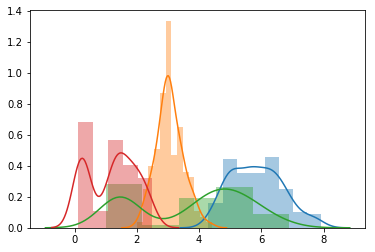

In [92]:
# matplotlib does not have the ability to plot the kernel density function
import matplotlib.pyplot as plt
# So, we are using seaborn instead
import seaborn as sns
%matplotlib inline

# You can check from these curves that Sepal data is normally distributed, but
# the petal data is not. Try them on one by one.

sns.distplot(iris_data[:,0], hist=True, kde=True)
sns.distplot(iris_data[:,1], hist=True, kde=True)
sns.distplot(iris_data[:,2], hist=True, kde=True)
sns.distplot(iris_data[:,3], hist=True, kde=True)

Only the Sepal data is normally distributed. Ideally, we should just be using the sepal data ( Sepal Length and Sepal Width ). However, let's just use all of these and see what happens. As an exercise, try using just the sepal data and check for the accuracy. 

In [107]:
# 1. train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data , iris_target, test_size=0.2)  

# 2. Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)  

# 3. Predict data
y_predict = model.predict(X_test)

# 4. Create a confusion matrix to check accuracy
print ( pd.crosstab(y_test, y_predict,rownames=['Actual'], colnames=['Predicted'],  margins=True) )

# 5. Print the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

print ( confusion_matrix(y_test, y_predict) )
print ( accuracy_score(y_test,y_predict))


Predicted  0   1   2  All
Actual                   
0          6   0   0    6
1          0  11   1   12
2          0   1  11   12
All        6  12  12   30
[[ 6  0  0]
 [ 0 11  1]
 [ 0  1 11]]
0.9333333333333333


That's pretty accurate as well , isn't it ? In fact even though one of the assumptions (all the variables should be independent of each other ) is wrong, Naive Bayes still outperforms some other classification algorithms.

- The priors ( Probability of a "Setosa" occuring or a "Virginica" occuring .. ) is 0.33 ( a third ) - which we know.
- How about the conditional probabilities ? This is where it gets tricky for continuous variables. You cannot have conditional probabilities for each of the values ( as the number can get infinite ). So, in case of a normal distribution, an approximation is applied based on the following formula.

<img src="./pics/conditional_probability.png"/>

where μ is the mean and σ is the variance